<a href="https://colab.research.google.com/github/cbuie/colab/blob/master/sklearn_10_years_later.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn 10 years later.
Latest feature releases for version 0.22.0

The features discussed here will be based off the latest updates to 0.22.

To check what verion of sklearn you are currently running execute the following command in your testing environement. 


In [0]:
import sklearn

sklearn.__version__


'0.22.1'

# Installing a specific version. 

To load the latest version of sklearn run: <code>!pip install --upgrade scikit-learn</code> in your notebook
Or if you want to install a specific version run this command:<code> pip install scikit-learn==0.18.2 </code>

For more specifics on installing sklearn check out the documentation here: https://scikit-learn.org/stable/install.html


---



---



In [0]:
    import pandas as pd


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Let's make some data.



In [0]:
X, y = make_classification(random_state=4, n_features=8,n_samples=1000)
# X, y = make_classification(n_classes=4, n_informative=16)
df=pd.concat([pd.Series(y,name='y'),pd.DataFrame(X)],axis=1)


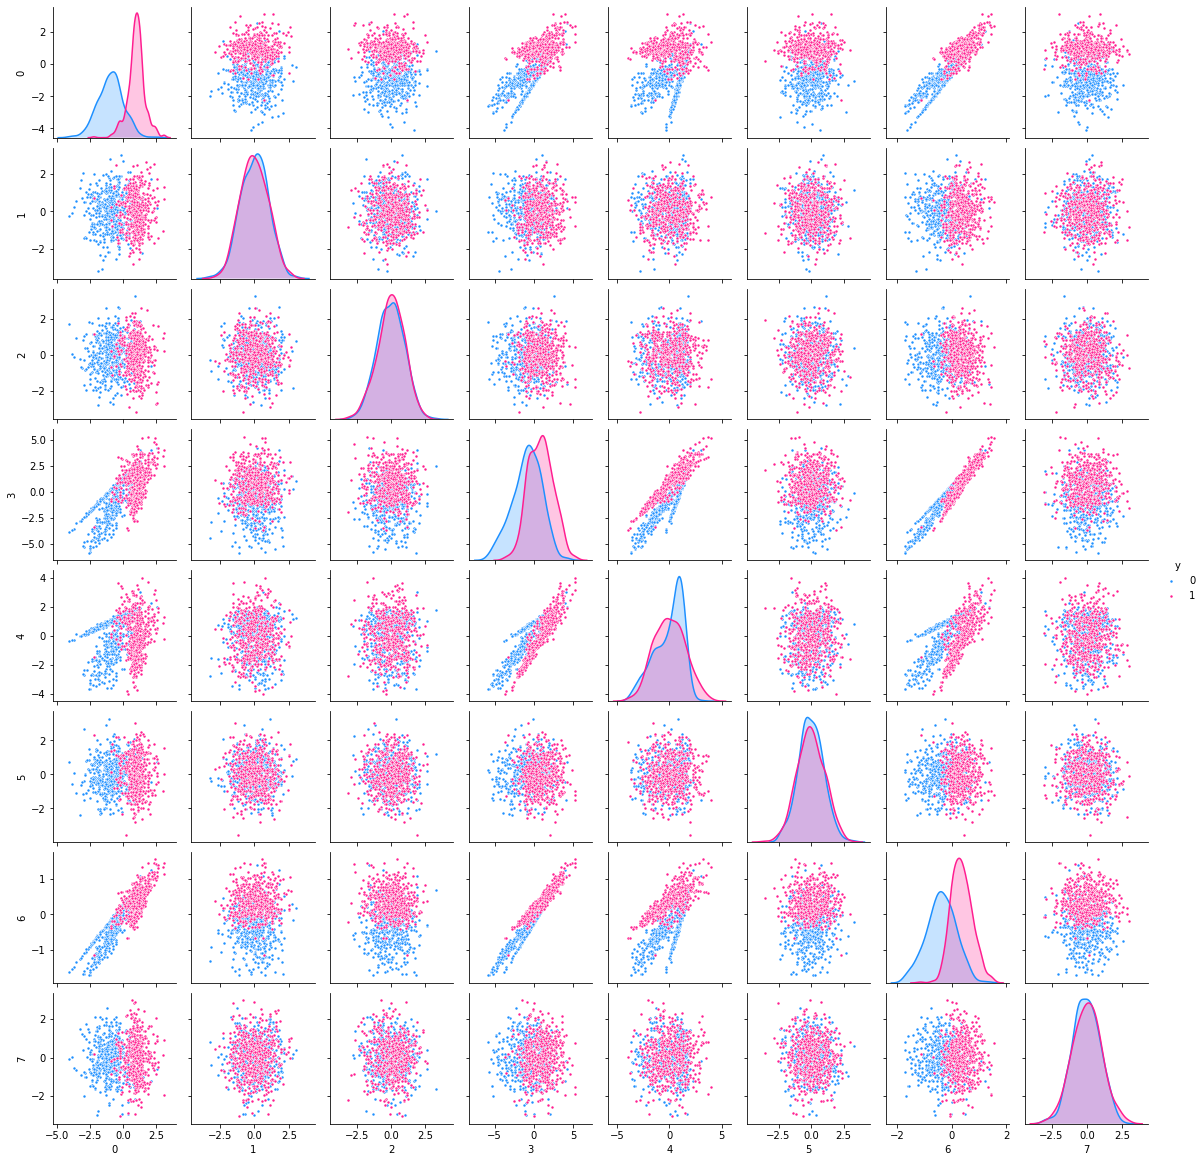

In [102]:
sns.pairplot(df,hue='y',palette=['#1e90ff','#ff1e90'],height=2,plot_kws={"s": 9, 'linewidth':0.5})

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

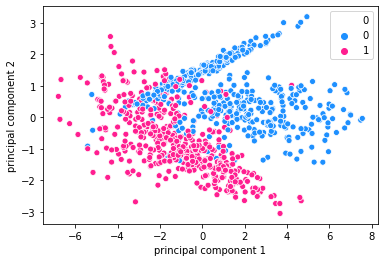

In [104]:
sns.scatterplot(x='principal component 1',y='principal component 2', data=pd.concat([pd.Series(y),principalDf],axis=1),hue=0,palette=['#1e90ff','#ff1e90'])

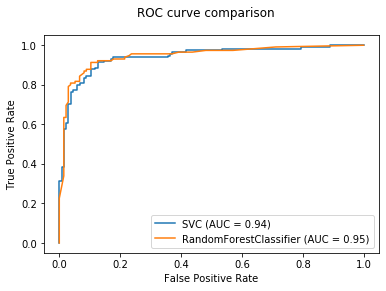

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")


plt.show()
